<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

## Import

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploring data

### Read cleaned data from file

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [2]:
cleaned_df = pd.read_csv('../data/processed/IMDbMovies_processed.csv')

In [3]:
# TEST
cleaned_df.head()

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Runtime (Minutes),Release Year,Rating (Out of 10),Number of Ratings (in thousands),Budget (in milions),Gross in US & Canada (in milions),Gross worldwide (in milions),Opening Weekend Gross in US & Canada (in milions)
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,158.0,2023.0,6.7,38.0,67.8,37.514498,84.968381,20.638887
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,157.0,2023.0,7.2,37.0,100.0,105.043414,191.729235,44.607143
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,118.0,2023.0,6.8,117.0,67.8,46.800000,0.421332,12.500000
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,102.0,2023.0,7.0,10.0,67.8,46.800000,87.100000,12.500000
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,106.0,2023.0,7.0,9.1,67.8,25.408677,29.666585,10.306272


In [4]:
# TEST
cleaned_df.shape

(9083, 14)

## Question 1: Which film genre is most appreciated?

### Step 0: Purpose
- Consider the audience interest in each film genre.
- Helps producers predict audience reception to choose the most suitable script, actors, etc.

### Step 1: Analyzing
- We will consider the `Main Genres` and `Rating (Out of 10)` column.
- We create a dictionary with key is the genre and value is a list of this genre's film rating.

In [5]:
fixed_df = cleaned_df[['Title', 'Main Genres', 'Rating (Out of 10)']].reset_index(drop = True)
fixed_df['Main Genres'] = fixed_df['Main Genres'].str.split(',')
genre_dict = {}
for i in range(len(fixed_df['Main Genres'])):
    genres = fixed_df['Main Genres'][i]
    if (type(genres) != list):
        continue
    for genre in genres:
        if genre not in genre_dict:
            genre_dict[genre] = []
        genre_dict[genre].append(fixed_df['Rating (Out of 10)'][i])

### Step 2: Visualization
- After analyzing, we draw the histogram for each genre, show the distribution of rating.

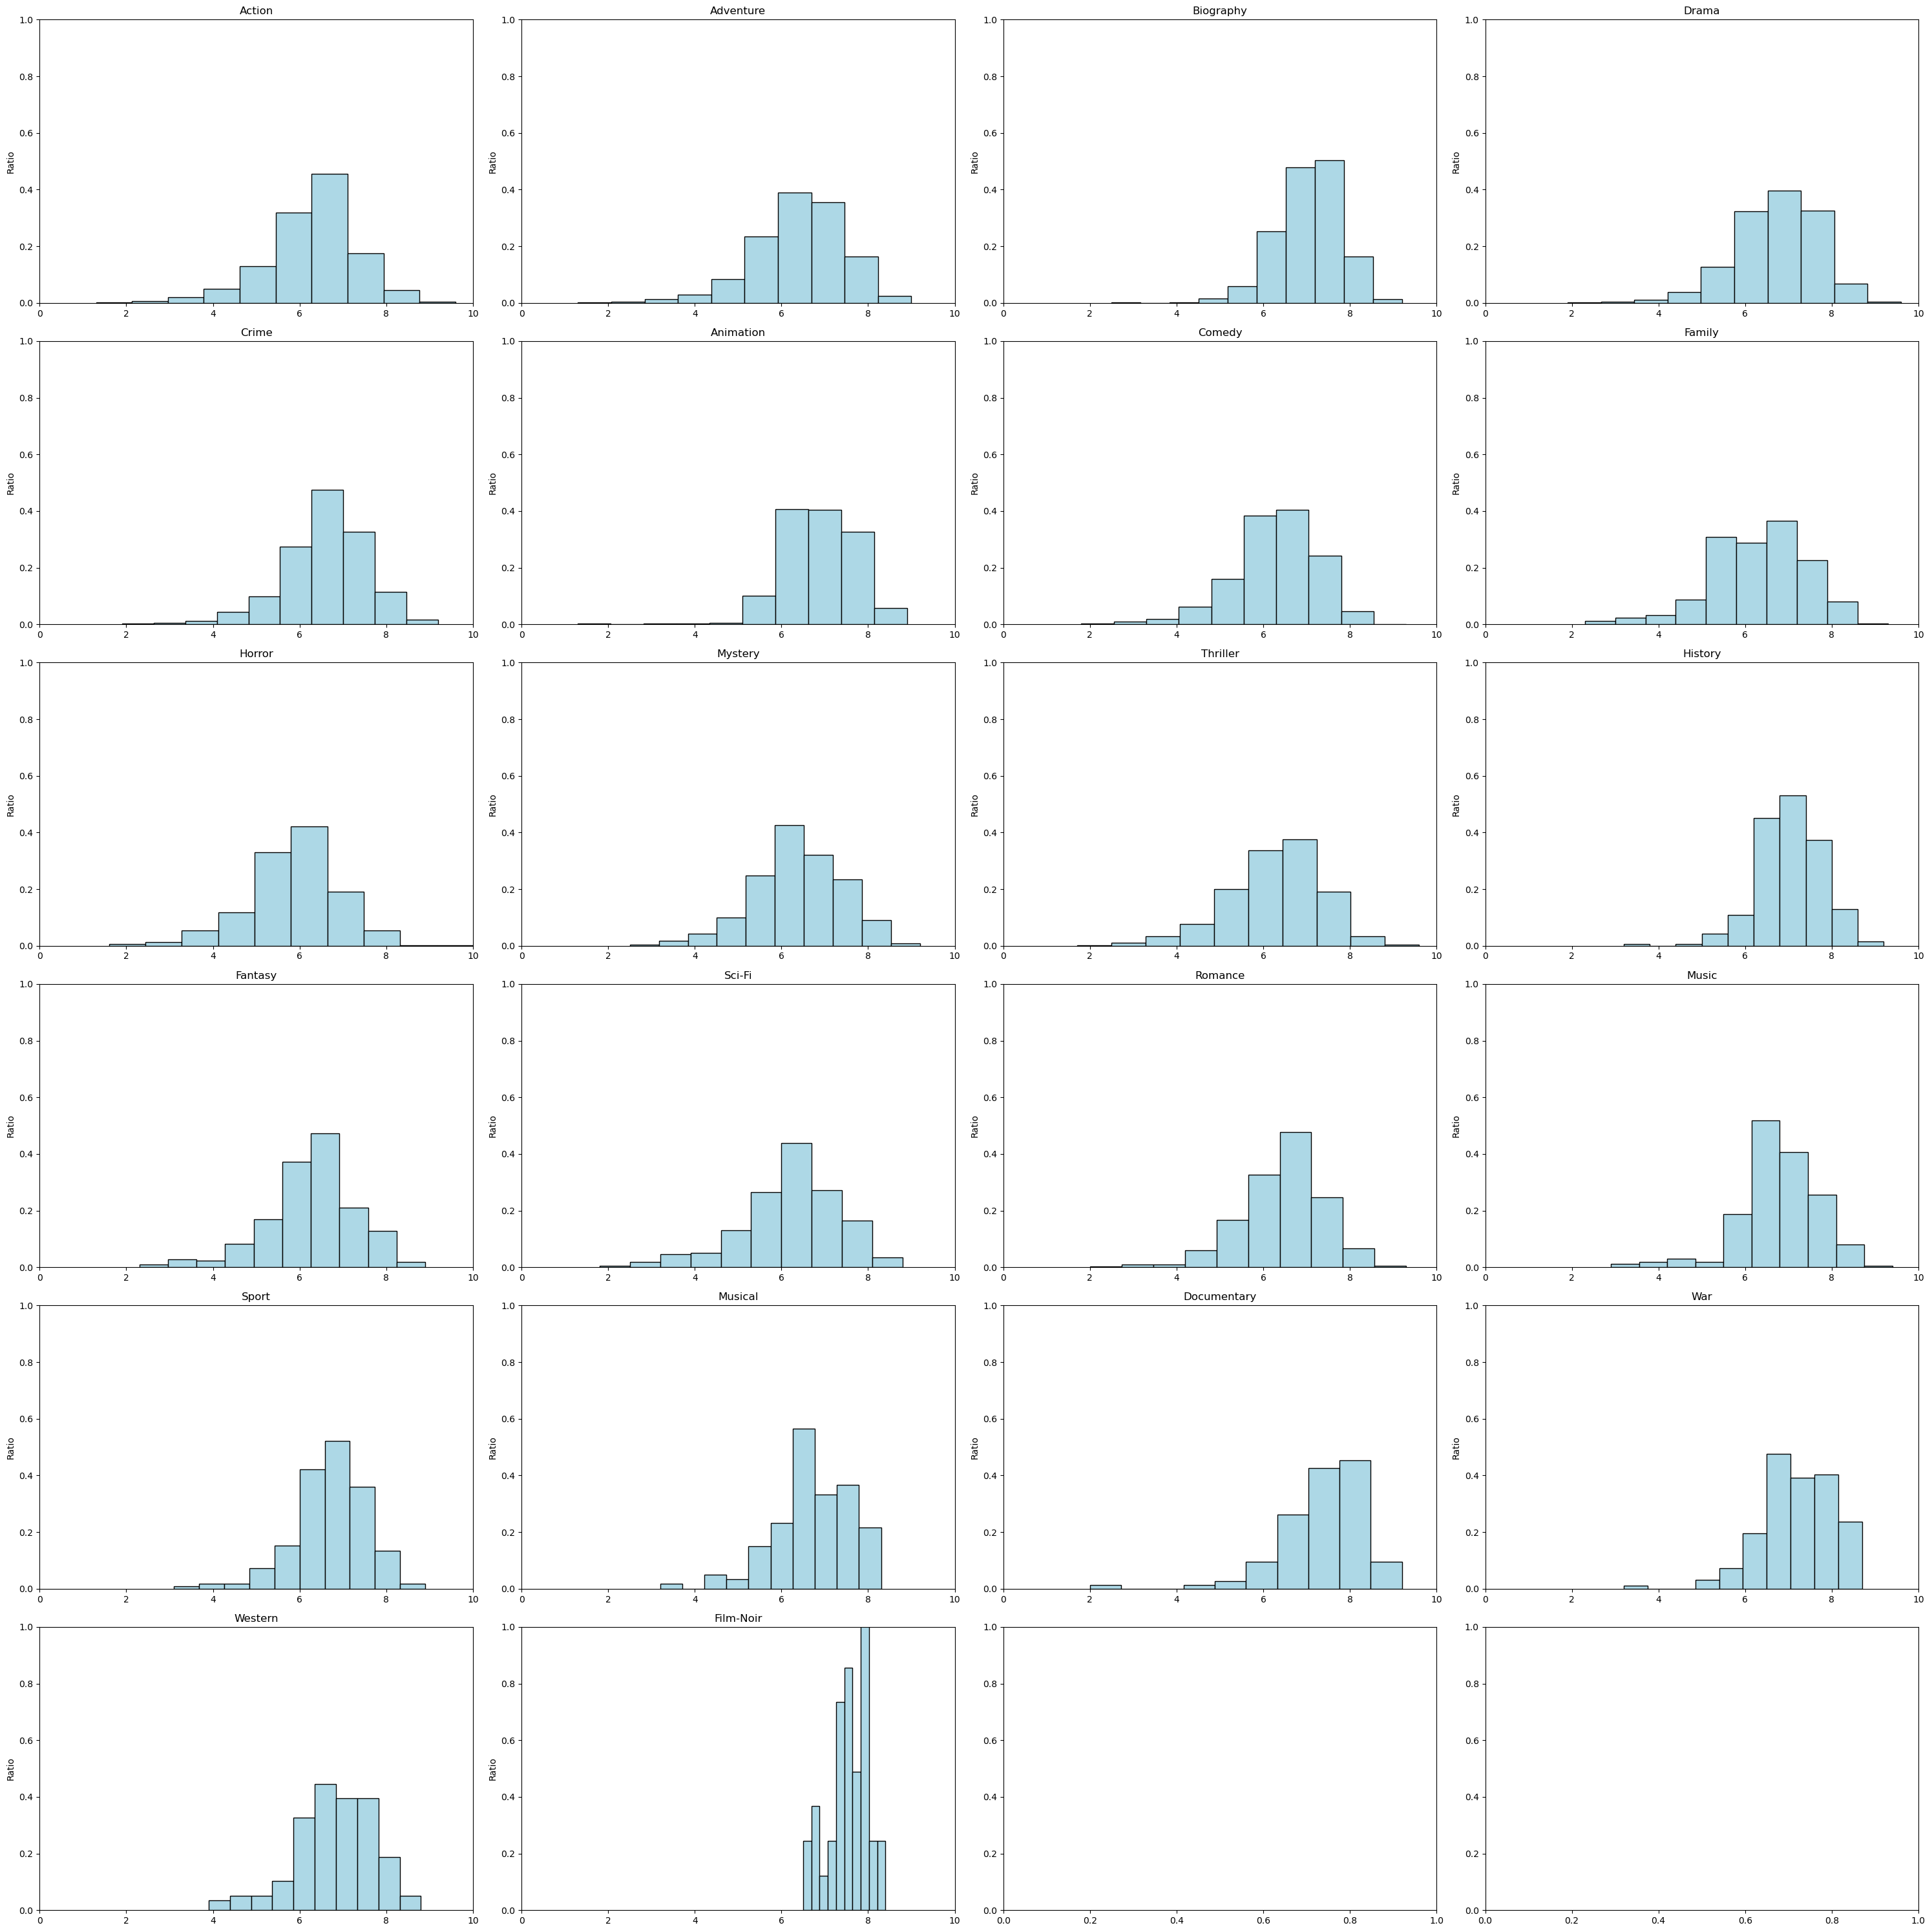

In [6]:
num_rows = 6
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize = (30, 30))

for i, (key, value) in enumerate(genre_dict.items()):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].hist(value, bins = 10, density=True, color = 'lightblue', edgecolor = 'black')
    axes[row_index, col_index].set_title(key)
    axes[row_index, col_index].set_xlim(0, 10)
    axes[row_index, col_index].set_ylim(0, 1)
    axes[row_index, col_index].set_ylabel('Ratio')

plt.tight_layout()
plt.show()

### Step 3: Give observation
- In general, the average rating of genres ranges from 6 to 8.
- Some genres has high above-8-rating is Biography, Crime, History, Documentary.
- Although the number of films in the Film-noir genre is not big, they are highly appreciated.
- Some genres like Action, Adventure, Family, ... the below-5-rating is still high, maybe because these genres are so popular.

So, we suggest that producers try new genres or refresh old topic to gain the attention from customers.

## Question 2: The relationship between the Gross in US & Canada and the Gross worldwide

### Step 0: Purpose
- Consider whether the gross in US & Canada is proportional to the gross worldwide.
- Helps producers predict audience reception to choose the most suitable script, actors, etc

### Step 1 & 2: Analyzing & Visualization
- We will consider the `Gross in US & Canada (in milions)` and `Gross worldwide (in milions)` column.
- We create a dictionary with key is the genre and value is a list of this genre's film rating.

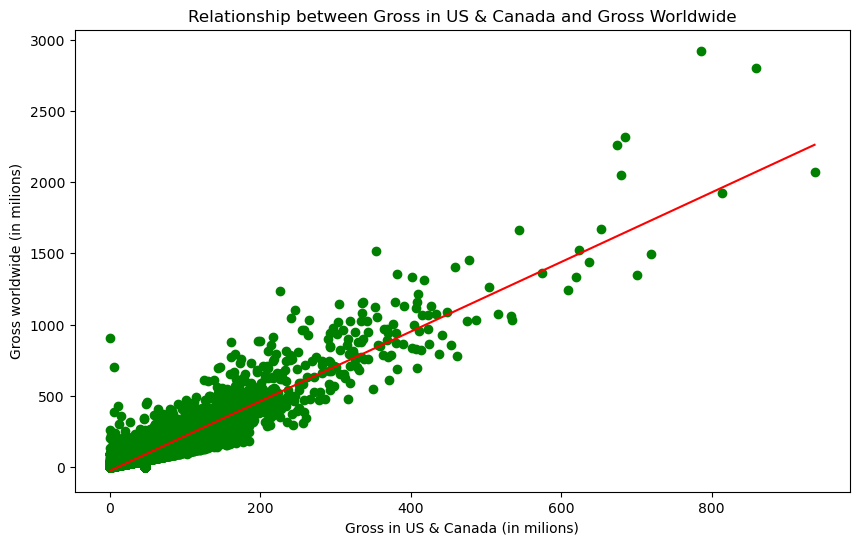

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['Gross in US & Canada (in milions)'], cleaned_df['Gross worldwide (in milions)'], c = 'green')
plt.xlabel('Gross in US & Canada (in milions)')
plt.ylabel('Gross worldwide (in milions)')
plt.title('Relationship between Gross in US & Canada and Gross Worldwide')

lr = np.polyfit(cleaned_df['Gross in US & Canada (in milions)'], cleaned_df['Gross worldwide (in milions)'], 1)
line = np.poly1d(lr)
x = np.linspace(cleaned_df['Gross in US & Canada (in milions)'].min(), cleaned_df['Gross in US & Canada (in milions)'].max())
plt.plot(x, line(x), color='red')

plt.show()

### Step 3: Give observation
- The normal gross of a film is about above 200 millions in US & Canada and about 500 millions worldwide.
- We can easily see the linear regression between them is upward with strong correlation coefficient.
- Base on the relationship between these two gross, producers can predict the gross worldwide after has this number of US & Canada. So that, they can deal with situations like releasing the film in more countries if it's good at US & Canada or promoting more if it not.

## Question 3: Is the writer direct the film a good way?

### Step 0: Purpose
- Determine if films' ratings are affected by the writers as directors.

### Step 1: Analyzing
- We will consider the `Director`, 'Writer' and `Rating (Out of 10)` column.
- We create two subdataset, one is the rating of films whose the writer is also the director and another one is the rating of films that the writer don't work as a director.

In [8]:
fixed_df = cleaned_df[['Title', 'Director', 'Writer', 'Rating (Out of 10)']].reset_index(drop = True)
fixed_df['Director'] = fixed_df['Director'].str.split(',')
fixed_df['Writer'] = fixed_df['Writer'].str.split(',')

director_writer_duo = pd.DataFrame(columns = ['Title', 'Director - Writer', 'Rating'])
non_director_writer_duo = pd.DataFrame(columns = ['Title', 'Rating'])

for i in range(len(fixed_df['Title'])):
    if (type(fixed_df['Writer'][i]) != list or type(fixed_df['Director'][i]) != list):
        continue
    flag = False
    for director in fixed_df['Director'][i]:
        if director in fixed_df['Writer'][i]:
            flag = True
            break
    if (flag == True):
        director_writer_duo = director_writer_duo.append({'Title': fixed_df['Title'][i], 'Director - Writer': director, 'Rating': fixed_df['Rating (Out of 10)'][i]}, ignore_index = True)
    else:
        non_director_writer_duo = non_director_writer_duo.append({'Title': fixed_df['Title'][i], 'Rating': fixed_df['Rating (Out of 10)'][i]}, ignore_index = True)

In [9]:
director_writer_duo

,Title,Director - Writer,Rating
0,Leo,Robert Smigel,7.0
1,Thanksgiving,Eli Roth,7.0
2,Oppenheimer,Christopher Nolan,8.5
3,Saltburn,Emerald Fennell,7.5
4,The Marvels,Nia DaCosta,6.0
...,...,...,...
4135,Confessions,Tetsuya Nakashima,7.7
4136,Downhill,Nat Faxon,4.9
4137,Sleep,Jason Yu,6.9
4138,Young Adam,David Mackenzie,6.4


In [10]:
non_director_writer_duo

,Title,Rating
0,Napoleon,6.7
1,The Hunger Games: The Ballad of Songbirds & Sn...,7.2
2,The Killer,6.8
3,Trolls Band Together,6.0
4,Blue Beetle,6.0
...,...,...
4588,Jessabelle,5.4
4589,The Marine,4.7
4590,Over the Moon,6.3
4591,The Greatest Show on Earth,6.5


### Step 2: Visualization
- After analyzing, we draw the histogram for each group, show the density of rating.

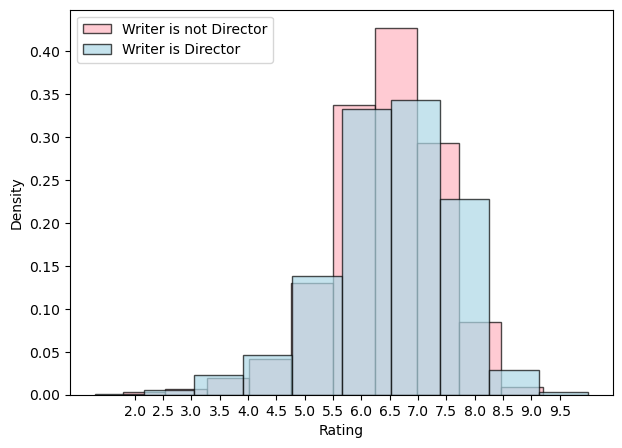

In [11]:
plt.figure(figsize=(7, 5))

plt.hist(non_director_writer_duo['Rating'], bins = 10, density = True, alpha=0.7, color='lightpink', edgecolor='black', label='Writer is not Director')

plt.hist(director_writer_duo['Rating'], bins = 10, density = True, alpha=0.7, color='lightblue', edgecolor='black', label='Writer is Director')

plt.xlabel('Rating')
plt.xticks(np.arange(2, 10, 0.5)) 
plt.ylabel('Density')
plt.legend()

plt.show()

### Step 3: Give observation
- Based on the chart, we see that both two groups of film's ratings concentrate in the similar range, but 'writer is director' group has higher range: 5.5 - 7.7 for film that writer isn't the director and 5.6 - 8.3 for the other.
- The high-rated films (above 8.5 - 9) are mainly in 'writer is director' group, higher group (rating > 9.2) is all 'writer is director' films. We think it's because the writer know clearly and axactly what the film should be, so if they direct the film, it will be good.
- However, in the lower-rating range (under 5.0), there's a lot of films in both group, even more in 'writer is director' one. So, it proves that it's not always the writer directs the film would be the good result, maybe it also depends on writer's ability, genre, budget, ...
- In general, it's a good choice for film-maker to have the writer be or support the director, but pay attentions to other factors.